**Akshat Aggarwal**

**E22CSEU0020**

**Question:-1**

**Loading the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Loading the Dataset**

In [2]:
train_data = pd.read_csv("SalaryData_Train.csv")
test_data = pd.read_csv("SalaryData_Test.csv")

**Checking for shapes**

In [3]:
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (30161, 14)
Test data shape: (15060, 14)


In [4]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**Separating the features and target from train and test data.**

In [5]:
X_train = train_data.drop(columns=['Salary'])  # Features
y_train = train_data['Salary']                 # Target

X_test = test_data.drop(columns=['Salary'])    # Features
y_test = test_data['Salary']                   # Target

In [6]:
X_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [7]:
y_train.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: Salary, dtype: object

**Applying one hot encoding on categorical variables**

In [8]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)


In [9]:
print("Train data shape after one-hot encoding:", X_train.shape)
print("Test data shape after one-hot encoding:", X_test.shape)

Train data shape after one-hot encoding: (30161, 102)
Test data shape after one-hot encoding: (15060, 102)


In [10]:
X_train.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,0,0,13,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,38,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


**Fitting the dataset in the Model**

In [11]:
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

**Prediciting the values**

In [12]:
y_pred = model.predict(X_test)


**Plotting the Confusion Matrix**

<IPython.core.display.Javascript object>

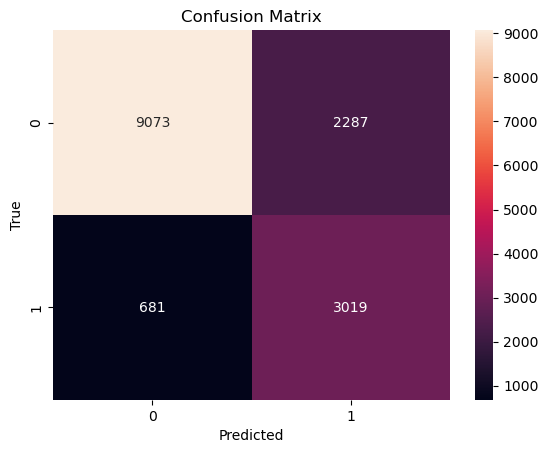

In [13]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

**Calculating the Accuracy, Precision, Recall and F1 Score**

In [14]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=" <=50K")  # Assuming <=50K as positive class
recall = recall_score(y_test, y_pred, pos_label=" <=50K")
f1 = f1_score(y_test, y_pred, pos_label=" <=50K")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8029216467463479
Precision: 0.9301824892351855
Recall: 0.7986795774647887
F1 Score: 0.8594297622430613
